In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv("/home/vaibhav/Downloads/Insurance/train.csv")

In [77]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [79]:
data.describe(include="object")

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [80]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Data Visualisation

GENDER


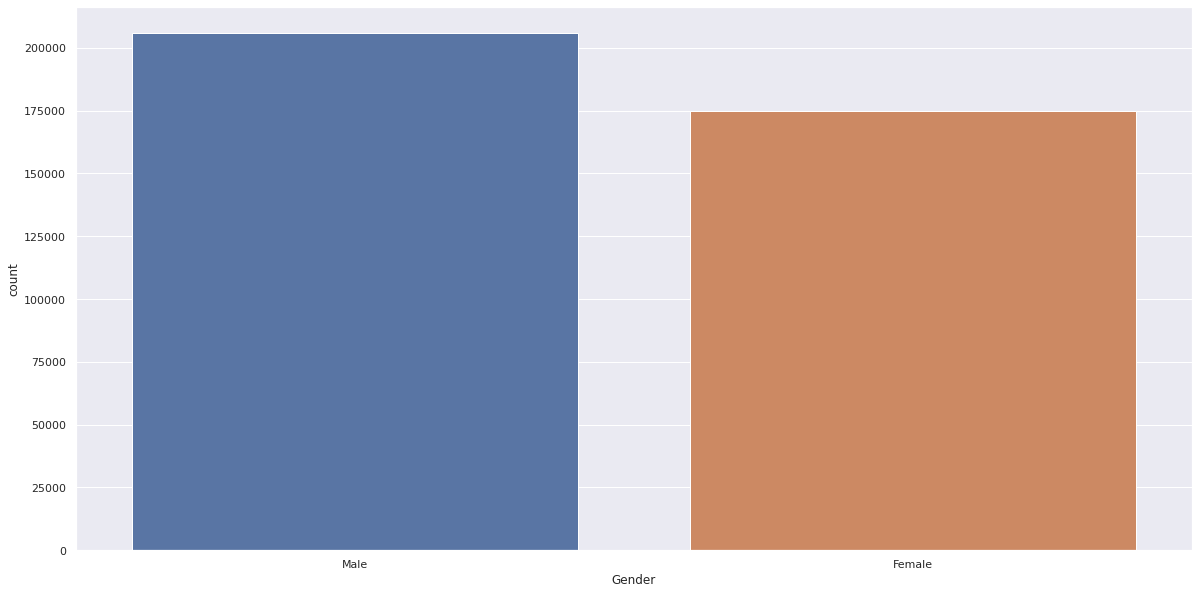


AGE


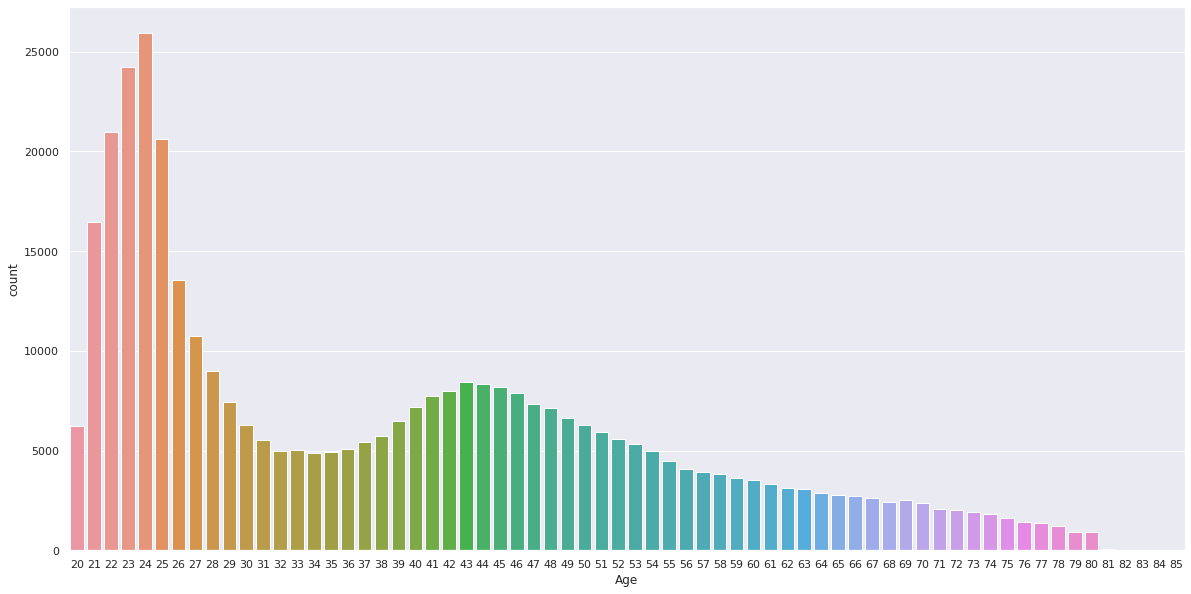


DRIVING_LICENSE


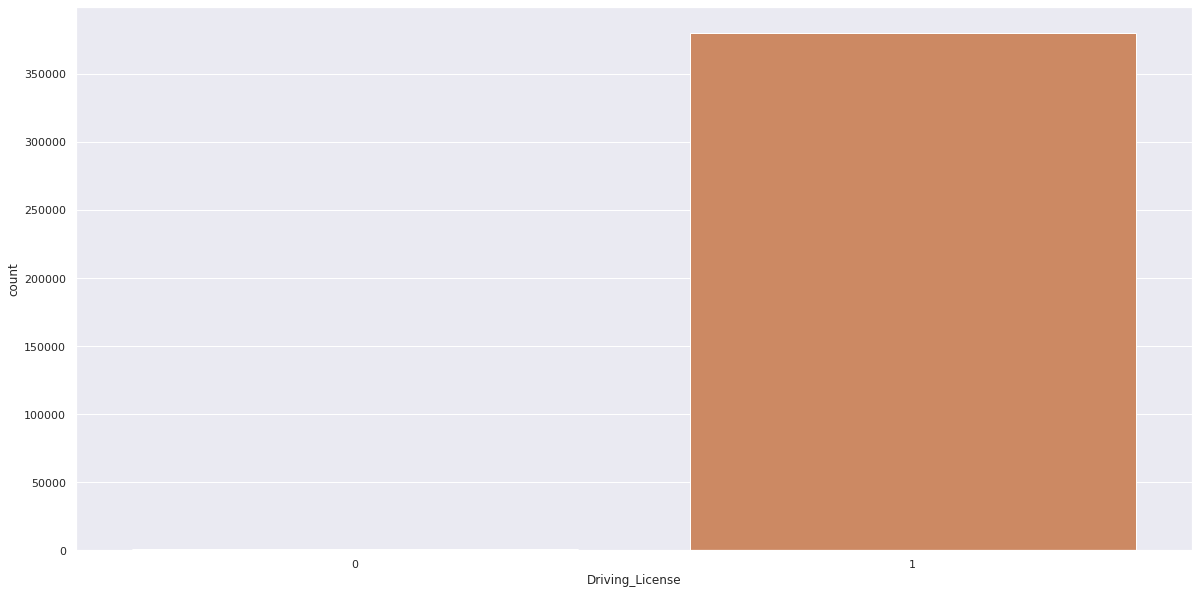


REGION_CODE


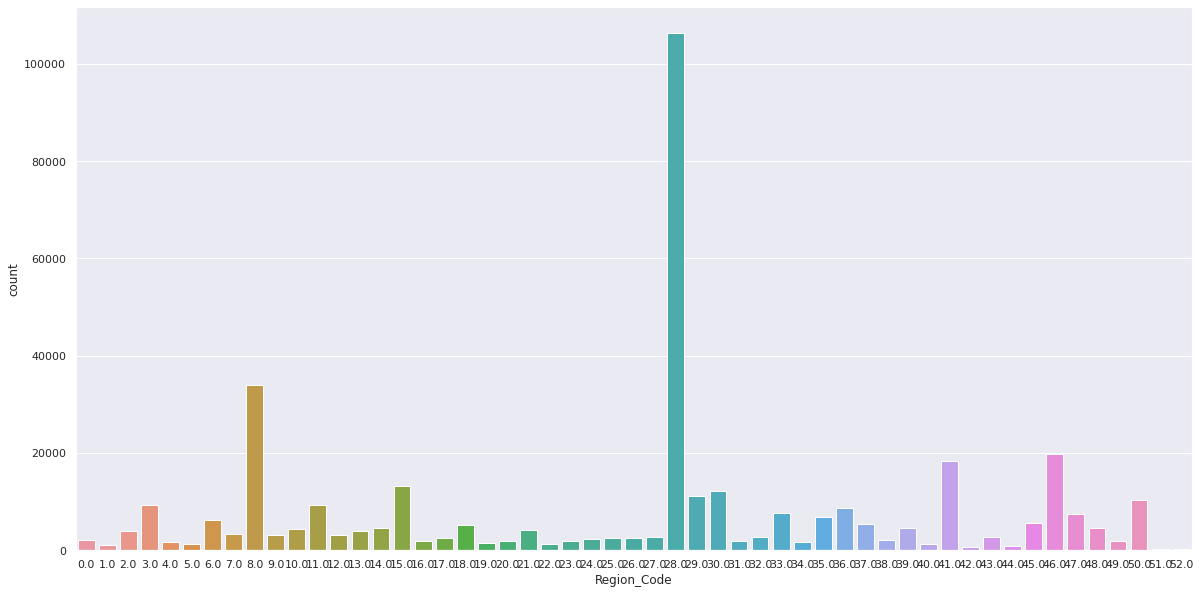


PREVIOUSLY_INSURED


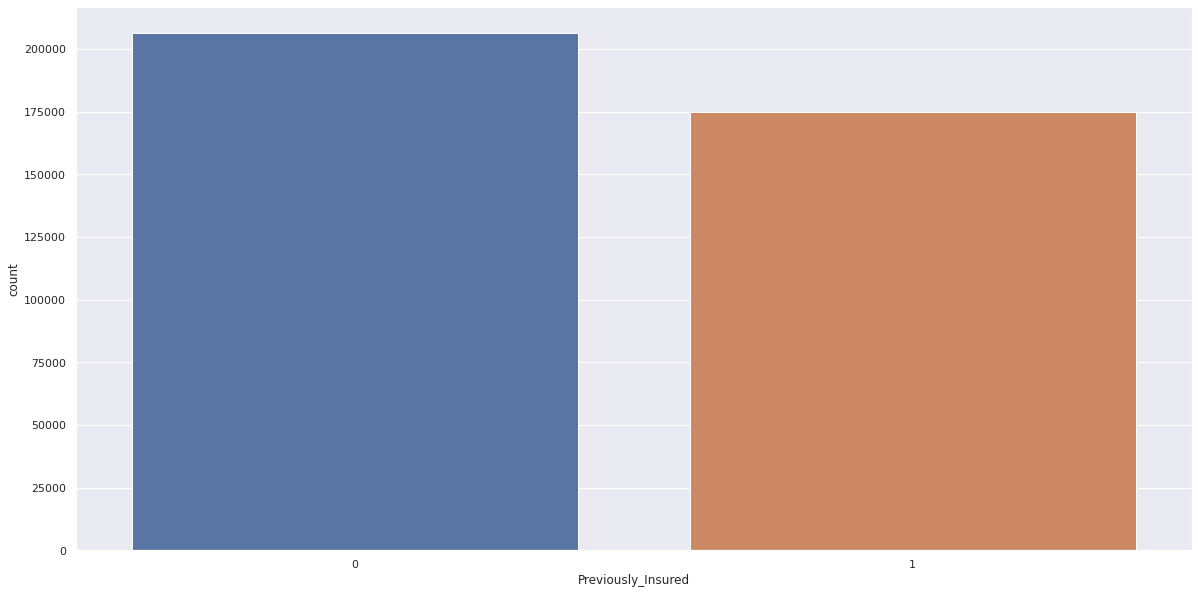


VEHICLE_AGE


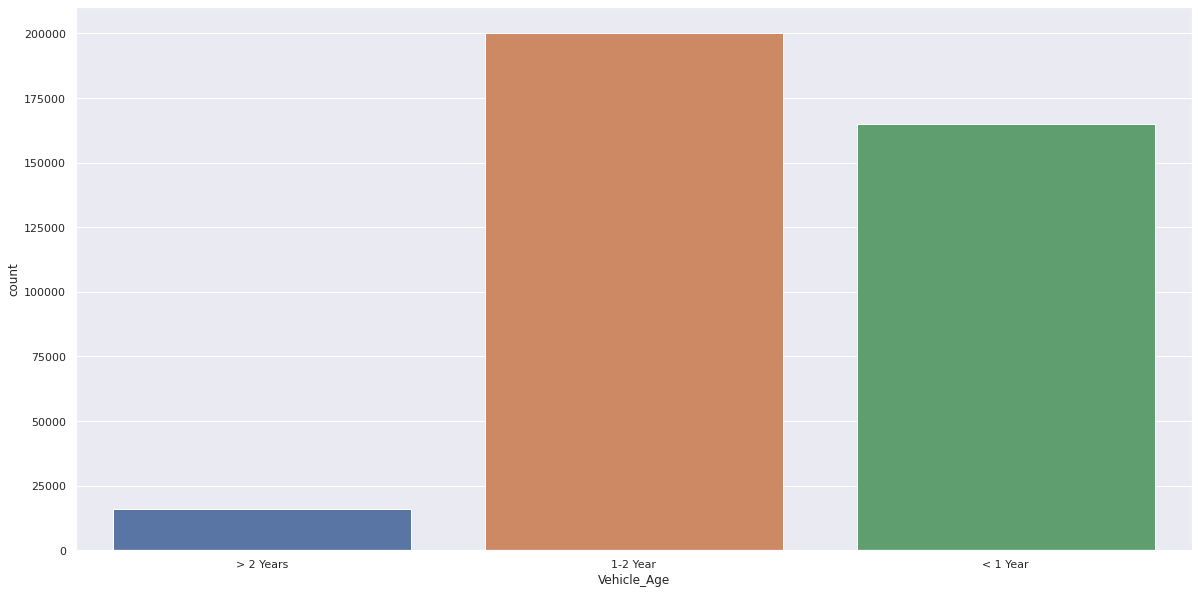


VEHICLE_DAMAGE


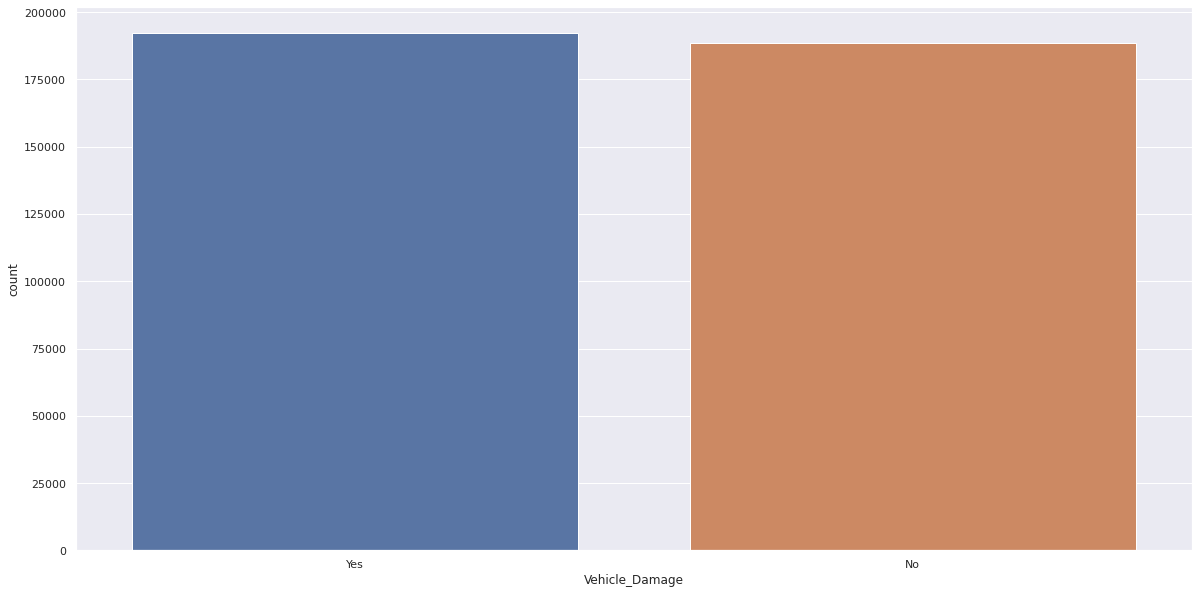


RESPONSE


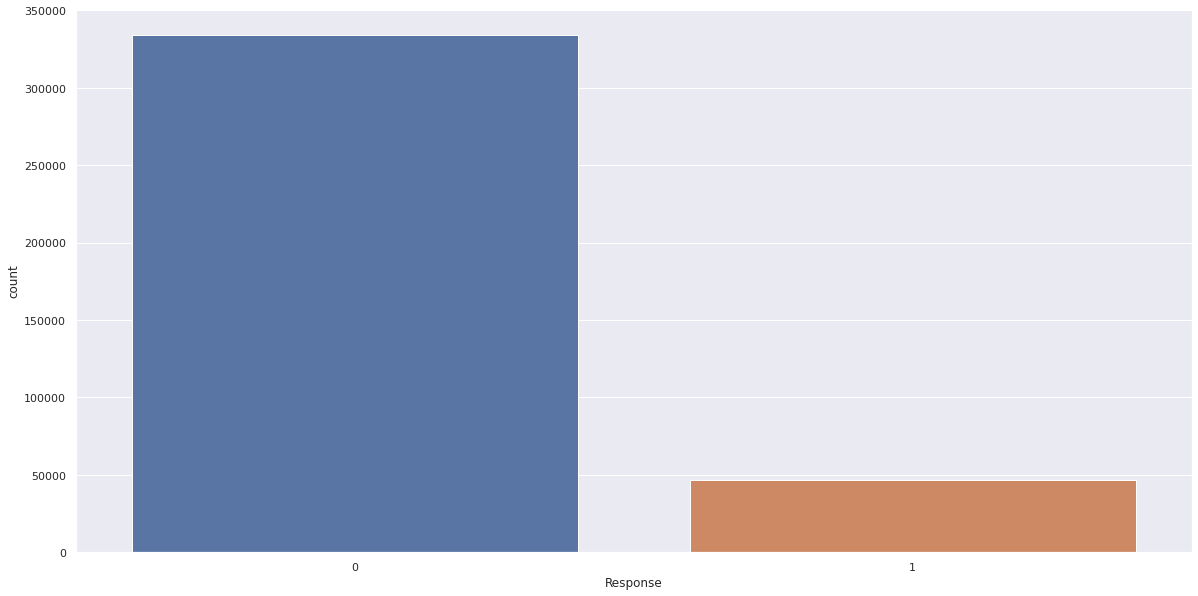

In [132]:

for i in data.drop(["id","Annual_Premium","Policy_Sales_Channel","Vintage"],axis=1):
    print(i.upper())
    fig,ax = plt.subplots(figsize=[20,10])
    sns.countplot(x=data[i],ax=ax)
    plt.show()
    print()

GENDER


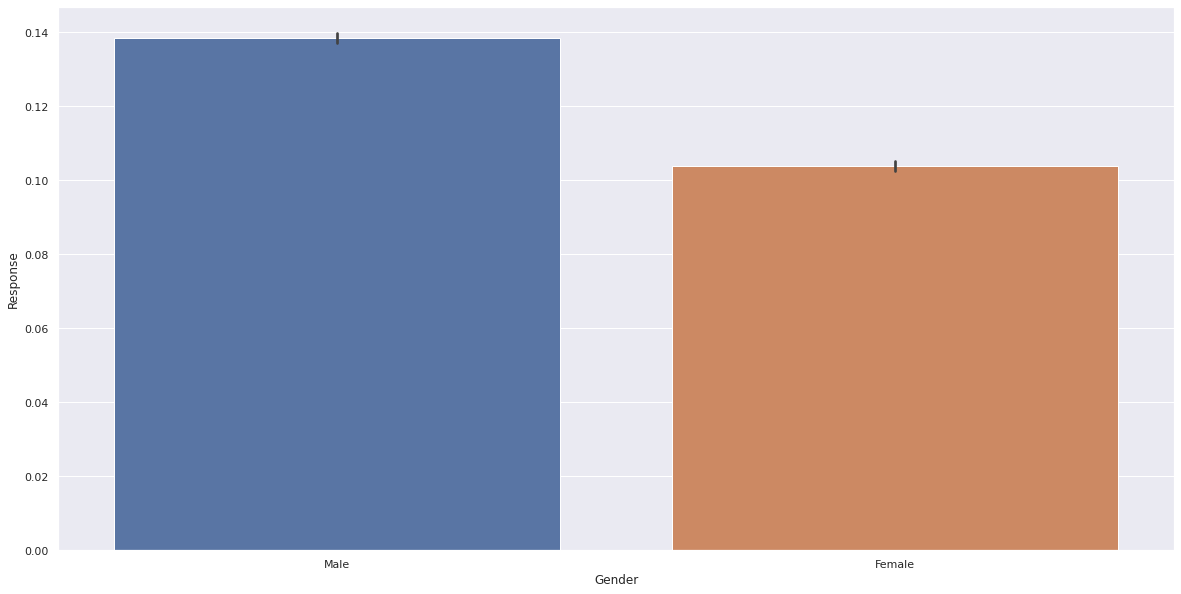


AGE


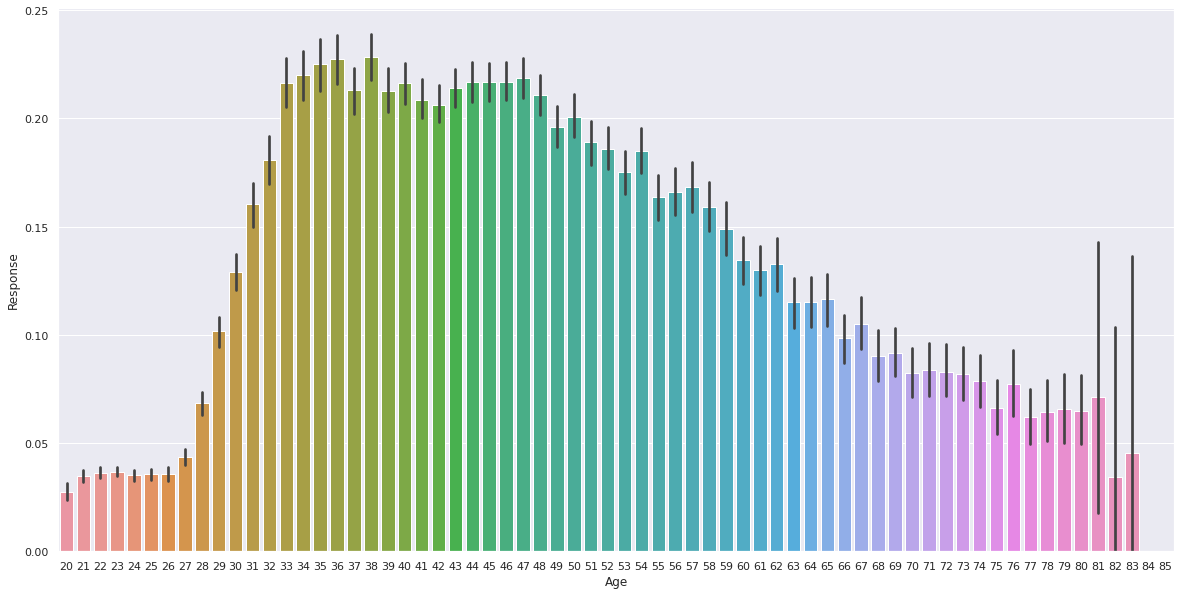


DRIVING_LICENSE


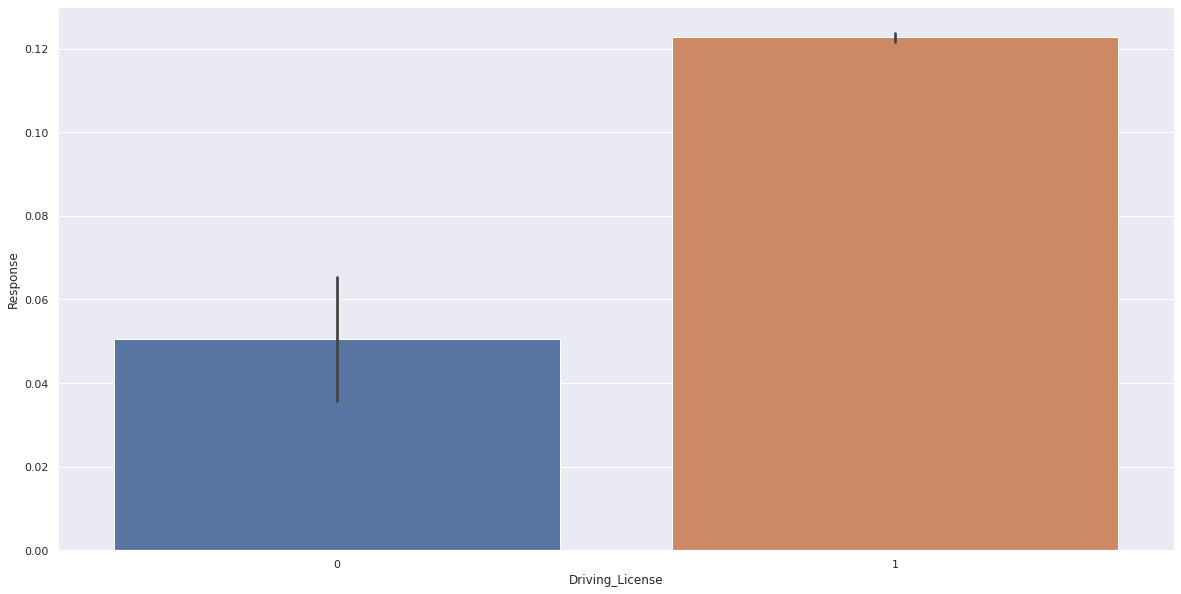


REGION_CODE


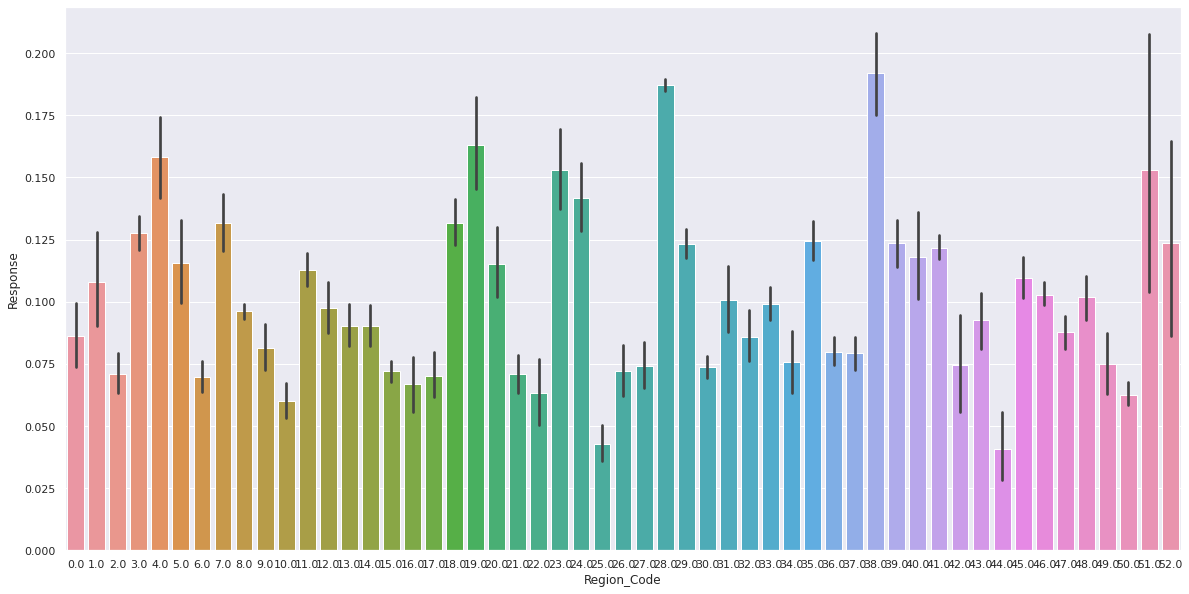


PREVIOUSLY_INSURED


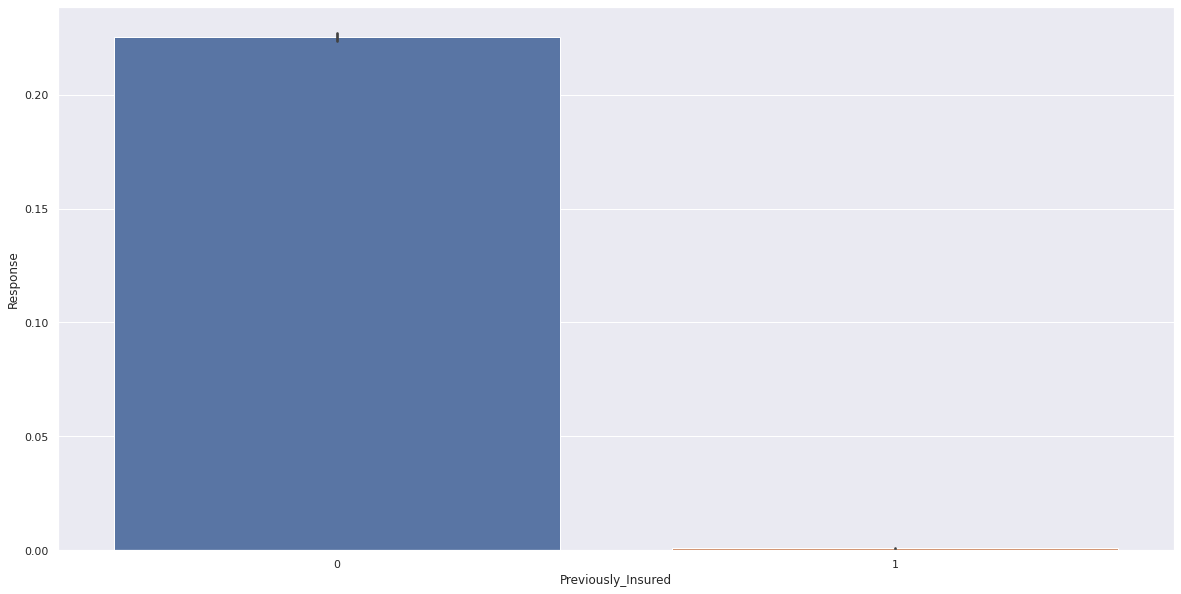


VEHICLE_AGE


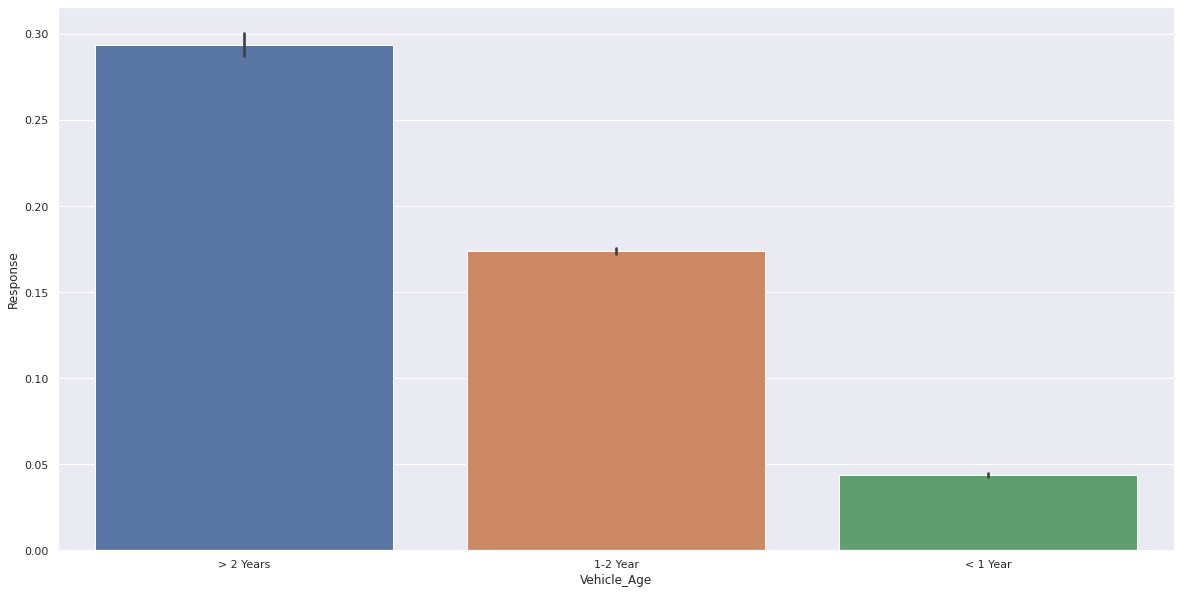


VEHICLE_DAMAGE


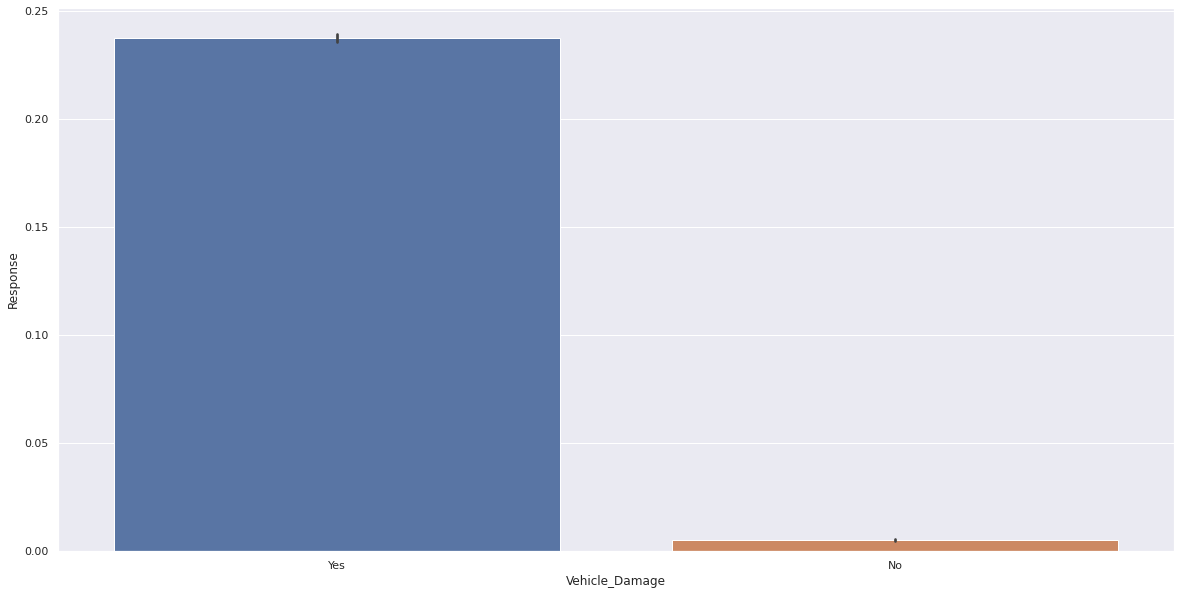

In [129]:

for i in data.drop(["id","Annual_Premium","Policy_Sales_Channel","Vintage","Response"],axis=1):
    print(i.upper())
    fig,ax = plt.subplots(figsize=[20,10])
    sns.barplot(x=data[i],y=data["Response"],ax=ax,)
    plt.show()
    print()

AGE


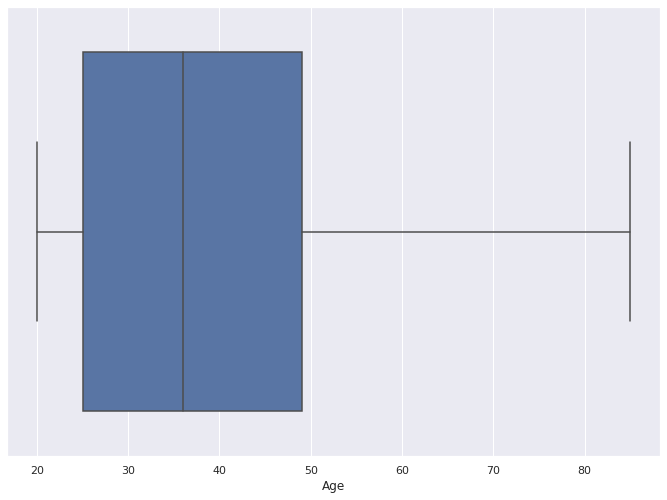


REGION_CODE


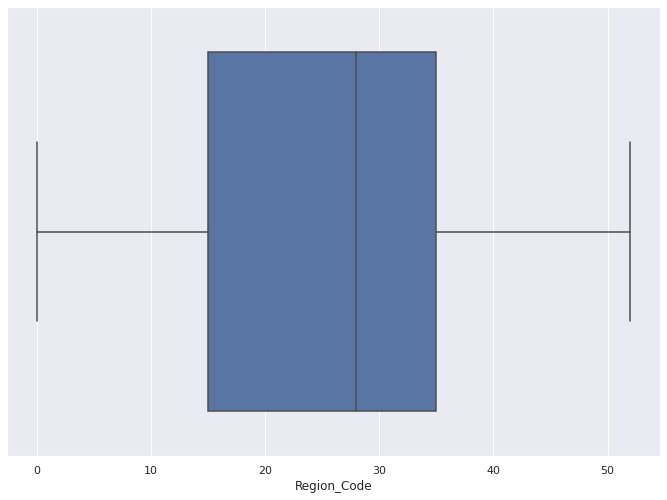


ANNUAL_PREMIUM


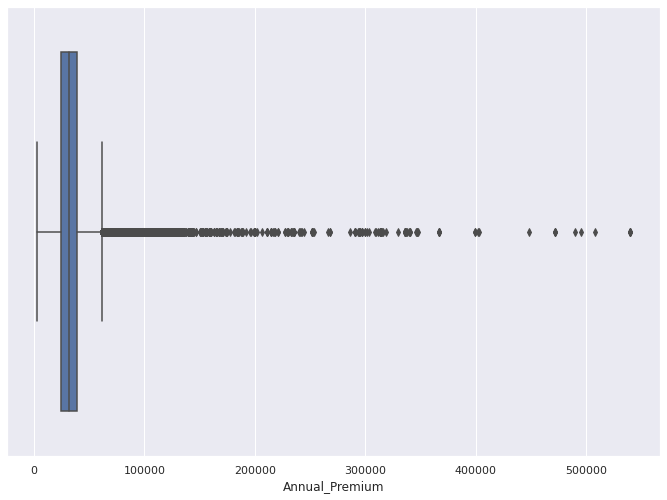


POLICY_SALES_CHANNEL


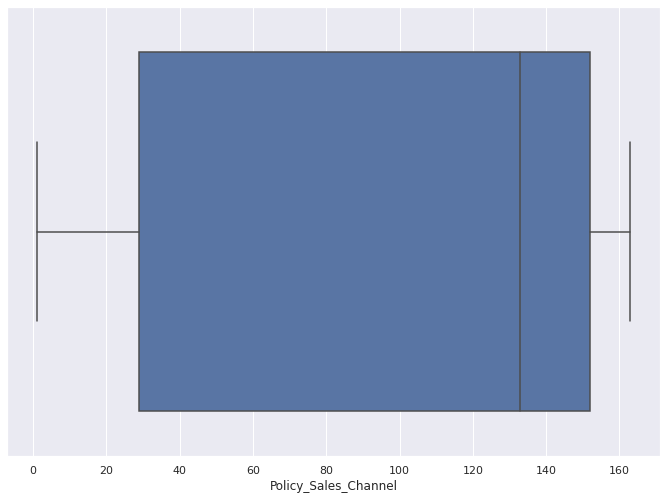


VINTAGE


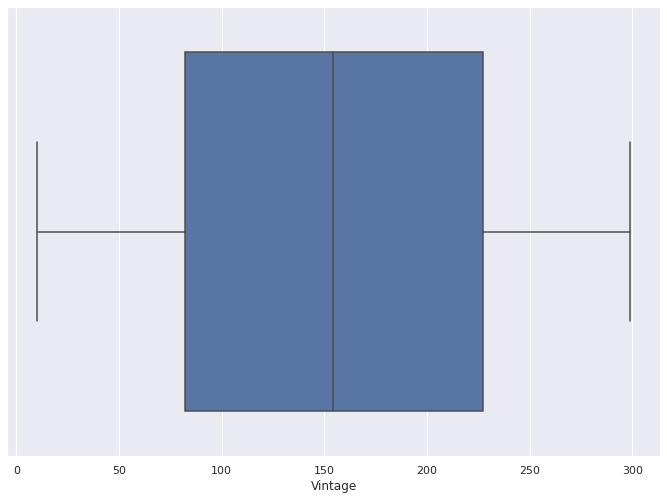

In [133]:
for i in data.drop(["Response","id","Vehicle_Age","Vehicle_Damage","Gender","Driving_License","Previously_Insured"],axis=1):
    print(i.upper())
    
    sns.boxplot(x=data[i])
    plt.show()
    print()

# Outlier
* Annual_Premium

In [134]:
annual_lim = np.percentile(data["Annual_Premium"],99)
print(annual_lim)

72963.0


In [135]:
data["Annual_Premium"][data.Annual_Premium >= (2*annual_lim)] = annual_lim*2

/tmp/ipykernel_13456/2457332502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Annual_Premium"][data.Annual_Premium >= (2*annual_lim)] = annual_lim*2


<AxesSubplot:xlabel='Annual_Premium'>

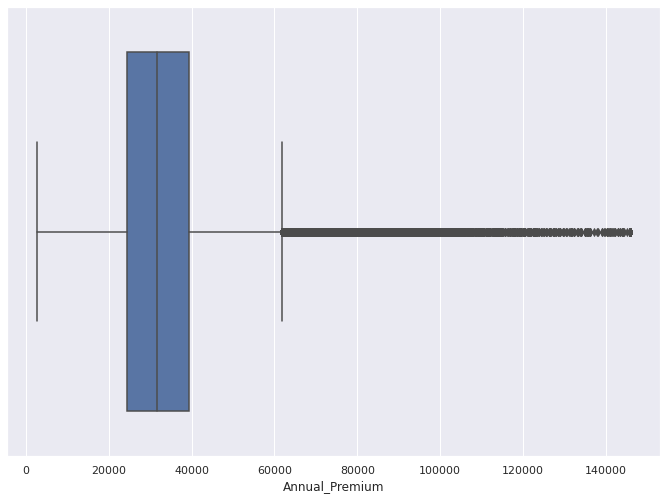

In [136]:
sns.boxplot(x=data["Annual_Premium"])

 # Dummy variable

In [137]:
data = pd.get_dummies(data)

In [138]:
data.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003097,-0.002837,-0.000630,-0.001368,-0.000999,0.000999,0.001370,-0.001194,-0.000464,0.001507,-0.001507
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.069080,-0.577826,-0.001264,0.111147,-0.145545,0.145545,0.692910,-0.787775,0.220694,-0.267534,0.267534
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.012513,0.043731,-0.000848,0.010155,0.018374,-0.018374,-0.037403,0.040215,-0.006211,0.016622,-0.016622
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.011403,-0.042420,-0.002750,0.010570,-0.000604,0.000604,0.038055,-0.044250,0.014555,-0.028235,0.028235
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.005165,0.219381,0.002537,-0.341170,0.081932,-0.081932,-0.279077,0.358773,-0.191352,0.824143,-0.824143
Annual_Premium,0.003097,0.069080,-0.012513,-0.011403,0.005165,1.000000,-0.116790,-0.000588,0.022699,-0.004145,0.004145,-0.003400,-0.022389,0.063760,-0.008990,0.008990
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.116790,1.000000,0.000002,-0.139042,0.111159,-0.111159,-0.508265,0.571516,-0.146238,0.224377,-0.224377
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000588,0.000002,1.000000,-0.001050,0.002517,-0.002517,-0.002632,0.002410,0.000600,0.002064,-0.002064
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022699,-0.139042,-0.001050,1.000000,-0.052440,0.052440,0.164317,-0.209878,0.109300,-0.354400,0.354400
Gender_Female,-0.000999,-0.145545,0.018374,-0.000604,0.081932,-0.004145,0.111159,0.002517,-0.052440,1.000000,-1.000000,-0.147633,0.166280,-0.043155,0.091606,-0.091606


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     381109 non-null  int64  
 1   Age                    381109 non-null  int64  
 2   Driving_License        381109 non-null  int64  
 3   Region_Code            381109 non-null  float64
 4   Previously_Insured     381109 non-null  int64  
 5   Annual_Premium         381109 non-null  float64
 6   Policy_Sales_Channel   381109 non-null  float64
 7   Vintage                381109 non-null  int64  
 8   Response               381109 non-null  int64  
 9   Gender_Female          381109 non-null  uint8  
 10  Gender_Male            381109 non-null  uint8  
 11  Vehicle_Age_1-2 Year   381109 non-null  uint8  
 12  Vehicle_Age_< 1 Year   381109 non-null  uint8  
 13  Vehicle_Age_> 2 Years  381109 non-null  uint8  
 14  Vehicle_Damage_No      381109 non-nu

In [140]:
del data["Vehicle_Damage_No"]
del data["Vehicle_Age_> 2 Years"]
del data["id"]
del data["Region_Code"]
del data["Gender_Female"]
del data["Policy_Sales_Channel"]

In [141]:
data.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Damage_Yes
0,44,1,0,40454.0,217,1,1,0,0,1
1,76,1,0,33536.0,183,0,1,1,0,0
2,47,1,0,38294.0,27,1,1,0,0,1
3,21,1,1,28619.0,203,0,1,0,1,0
4,29,1,1,27496.0,39,0,0,0,1,0


# Splitting and Standardization

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
x_train,x_test,y_train,y_test = train_test_split(data.drop("Response",axis=1),
                                                 data["Response"],
                                                 test_size=0.2,
                                                 random_state=7)

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler = StandardScaler()

In [146]:
scaler.fit(x_train)

StandardScaler()

In [147]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Building Model

In [23]:
from sklearn import svm

In [24]:
model = svm.SVC(C=0.01,gamma="auto")

In [25]:
model.fit(x_train,y_train)

SVC(C=0.01, gamma='auto')

In [27]:
y_pred = model.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
score = accuracy_score(y_test , y_pred)

In [56]:
print("Accuracy:  %f%%"%score)

Accuracy:  0.878513%
